<a href="https://colab.research.google.com/github/SettibathulaJyothi/AI-ML-Internship-Projects/blob/main/Handwritten_Digit_Recognizer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwritten Digit Recognizer

In [ ]:
#Step 1: Install & Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Step 2: Load and Preprocess the Dataset
# Load MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Reshape data to match CNN input format (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Step 3: Define the CNN Model
# Define CNN architecture
model = Sequential([
Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
MaxPooling2D(pool_size=(2,2)),
Conv2D(64, kernel_size=(3,3), activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Flatten(),
Dense(128, activation='relu'),
Dropout(0.5),
Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Step 4: Train the Model
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 95ms/step - accuracy: 0.8095 - loss: 0.6031 - val_accuracy: 0.9789 - val_loss: 0.0635
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.9698 - loss: 0.1037 - val_accuracy: 0.9866 - val_loss: 0.0401
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.9785 - loss: 0.0725 - val_accuracy: 0.9883 - val_loss: 0.0344
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9822 - loss: 0.0591 - val_accuracy: 0.9898 - val_loss: 0.0307
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.9840 - loss: 0.0509 - val_accuracy: 0.9898 - val_loss: 0.0283
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.9863 - loss: 0.0429 - val_accuracy: 0.9904 - val_loss: 0.0284
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9897 - loss: 0.0349 - val_accuracy: 0.9910 - val_loss: 0.0273
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9888 - loss: 0.0353 - 

In [ ]:
#Step 5: Evaluate Model Performance
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9888 - loss: 0.0323
Test Loss: 0.025310376659035683
Test Accuracy: 99.08%


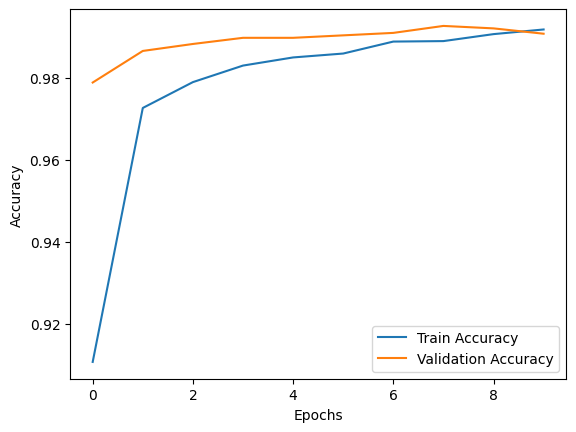

In [ ]:
#Step 6: Visualize Training Results
# Plot accuracy trends
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


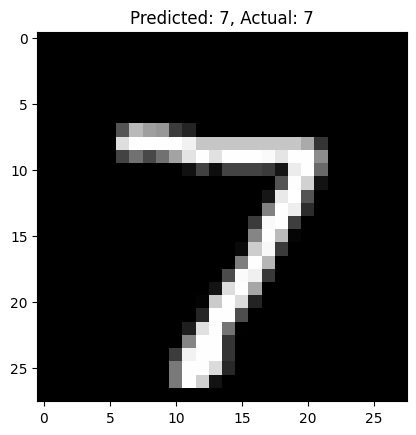

In [ ]:
#Step 7: Make Predictions & Visualize Results
import numpy as np
def predict_digit(index):
  img = X_test[index].reshape(1, 28, 28, 1)
  prediction = model.predict(img)
  predicted_label = np.argmax(prediction)
  actual_label = np.argmax(y_test[index])
  plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
  plt.show()
# Test prediction
predict_digit(0)
